In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

file = pd.ExcelFile('C:\\Users\\sachin\\Desktop\\DataQuest\\My Projects\\Siddesh Assignment\\Analytical Interview DATASET.xlsx')
profile = pd.read_excel(file,'Customer Profile Data (DS#1)')
past_purchase = pd.read_excel(file,'Past Purchase Data (Ds#2)')
camp_coverage = pd.read_excel(file,'Campaign Coverage Data (DS#3)')
monthly_data = pd.read_excel(file,'Month Level Customer Data (DS#4')
socio_economic = pd.read_excel(file,'Socio Economic Data (DS#5)')

In [187]:
from collections import Counter

transact_dict = dict(Counter(monthly_data['Customer_ID']))

In [188]:
for key,value in transact_dict.items():
    for id in monthly_data['Customer_ID']:
        if id==key:
            monthly_data['transactions'] = value
        else:
            break
            
monthly_data = monthly_data.groupby('Customer_ID').mean()

In [189]:
master = (profile.join(past_purchase,on = 'Customer_ID', how='left',lsuffix='_left')
                 .join(camp_coverage,on='Customer_ID',how='left',lsuffix='_left')
                 .join(monthly_data,on='Customer_ID',how='left',lsuffix='_left')
                 .join(socio_economic,on='Customer_ID',how='left',lsuffix='_left'))

In [190]:
master['avg_sales'] = master['Revenue']/master['transactions']



In [191]:
master = master.drop({'Customer_ID','Customer_ID_left'}, axis=1)
master = master.dropna()

In [192]:
cat = [col for col in master.columns if master.dtypes[col] == 'object']
num = [col for col in master.columns if master.dtypes[col] != 'object']

In [193]:
master[cat] = master[cat].apply(lambda x: x.astype('category'),axis=0)
master['buy_decision_flag'] = master['buy_decision_flag'].astype('category')
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3974 entries, 0 to 5144
Data columns (total 42 columns):
age                                 3974 non-null int64
job                                 3974 non-null category
marital_status                      3974 non-null category
education                           3974 non-null category
Previous_Default_Flag               3974 non-null category
House_Owned_Flag                    3974 non-null category
Loan_Availed_Flag                   3974 non-null category
Income_USD                          3974 non-null int64
Credit_rating                       3974 non-null category
Life_Stage_Code                     3974 non-null category
Ethnicity                           3974 non-null category
Employment                          3974 non-null category
Count_of_Transactions               3974 non-null int64
Loyalty_Tier                        3974 non-null category
Avg_Basket_Size                     3974 non-null float64
Reward_Points_Earn

In [194]:
y = master['buy_decision_flag']
x = master.loc[:, master.columns!= 'buy_decision_flag']

del x['Target_buy'] #deleting as it is same as the buy_decision_flag

In [195]:
from scipy import stats
from scipy.stats import chi2_contingency
def crosstab(b):
    chi2_stat, p_val, dof, ex = stats.chi2_contingency(pd.crosstab(master.buy_decision_flag,master[b]))

    print('p_val of Chi sqare test for {} : {} '.format( b, p_val))

chi_new = [crosstab(cat[i]) for i in range(len(cat))]

p_val of Chi sqare test for job : 0.3715232221701297 
p_val of Chi sqare test for marital_status : 0.1475986935443773 
p_val of Chi sqare test for education : 0.9567460167747472 
p_val of Chi sqare test for Previous_Default_Flag : 0.22892983406098488 
p_val of Chi sqare test for House_Owned_Flag : 0.07733887027123489 
p_val of Chi sqare test for Loan_Availed_Flag : 0.15862692265908937 
p_val of Chi sqare test for Credit_rating : 0.8681164065839938 
p_val of Chi sqare test for Life_Stage_Code : 0.6821809228703191 
p_val of Chi sqare test for Ethnicity : 0.03540753274589701 
p_val of Chi sqare test for Employment : 0.4203885407109419 
p_val of Chi sqare test for Loyalty_Tier : 0.24686579082299845 
p_val of Chi sqare test for Mode_of_contact : 5.271215151240869e-26 
p_val of Chi sqare test for month_last_contacted_left : 9.595077392036167e-70 
p_val of Chi sqare test for day_of_week_last_contacted : 0.19484280782732458 
p_val of Chi sqare test for outcome_last_campaign : 2.237571642118438

In [196]:
del x['Previous_Default_Flag']
del x['House_Owned_Flag']
del x['Loan_Availed_Flag']
del x['Ethnicity']
del x['Loyalty_Tier']
del x['Mode_of_contact']
del x['month_last_contacted_left']
del x['day_of_week_last_contacted']
del x['outcome_last_campaign']
del x['Duration_of_last_contact_type']
del x['Num_of_contact_campaign_type']
del x['Num_contact_before_campaign_type']
del x['month_last_contacted']
del x['marital_status']
del x['Campaign_Start_Date']

In [197]:
x_dummies = pd.get_dummies(x, drop_first=True)

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x_dummies, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3179, 47) (3179,)
Test set: (795, 47) (795,)


In [199]:
from sklearn.neighbors import KNeighborsClassifier
k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [200]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['no', 'no', 'no', 'no', 'no'], dtype=object)

In [201]:
from sklearn import metrics
print("Test set Accuracy: %.2f " %metrics.accuracy_score(y_test, yhat))

Test set Accuracy: 0.87 


## K Nearest Neighbour algorithm prodces results with 87% accuracy

In [202]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(x_dummies).transform(x_dummies)
X[0:5]

array([[ 4.31, -1.5 , -1.36,  0.56,  0.05,  0.44, -0.58,  0.2 , -0.35,
         0.02,  0.07, -0.17, -0.04,  0.  ,  0.84,  0.6 , -0.48,  0.77,
         0.84,  0.02, -0.48, -0.19, -0.16, -0.27,  5.03, -0.19, -0.33,
        -0.17, -0.46, -0.18, -0.22, -0.4 , -0.61, -0.02, -0.39, -0.7 ,
        -0.68, -0.51, -0.22,  1.82, -0.02, -0.69, -0.83,  6.76,  5.05,
        -0.27, -0.25],
       [ 1.04, -1.09, -1.41,  1.46, -0.12,  0.96, -0.58,  0.2 , -0.35,
        -0.74, -0.76, -0.66, -0.9 ,  0.  , -0.12, -0.64, -0.33,  0.28,
         0.39, -0.74,  2.07, -0.19, -0.16, -0.27, -0.2 , -0.19, -0.33,
        -0.17, -0.46, -0.18, -0.22,  2.5 , -0.61, -0.02, -0.39, -0.7 ,
         1.47, -0.51, -0.22, -0.55, -0.02, -0.69, -0.83, -0.15, -0.2 ,
        -0.27, -0.25],
       [-1.21, -1.21, -1.27, -0.09, -1.15, -0.51, -0.58,  0.2 , -0.35,
        -0.61, -0.61, -0.61, -0.96,  0.  ,  0.65,  0.73,  0.89,  0.71,
         0.33, -0.61, -0.48, -0.19, -0.16, -0.27, -0.2 , -0.19, -0.33,
        -0.17,  2.19, -0.18, -0

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3179, 47) (3179,)
Test set: (795, 47) (795,)


In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [205]:
yhat = LR.predict(X_test)
yhat[:5]

array(['no', 'no', 'no', 'no', 'no'], dtype=object)

In [206]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.89, 0.11],
       [0.91, 0.09],
       [0.72, 0.28],
       ...,
       [0.86, 0.14],
       [0.9 , 0.1 ],
       [0.89, 0.11]])

In [207]:
# Evaluation of model using Jaccard Index
from sklearn.metrics import jaccard_similarity_score
jaccard_score = jaccard_similarity_score(y_test, yhat)*100

print('Jaccard similarity Score is %.2f'%jaccard_score +'%')


Jaccard similarity Score is 88.55%


In [208]:
#Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=['yes','no']))

[[ 34  72]
 [ 19 670]]


Confusion matrix, without normalization
[[ 34  72]
 [ 19 670]]


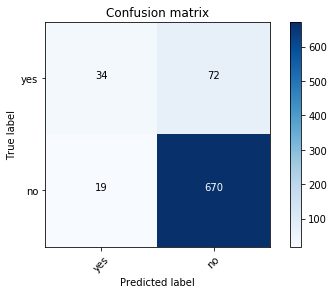

In [209]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['yes','no'])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['yes','no'],normalize= False,  title='Confusion matrix')

## Using Decision Trees

In [210]:
# Decision Trees

x = pd.get_dummies(x,drop_first=True)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(3179, 47) (3179,)
(795, 47) (795,)


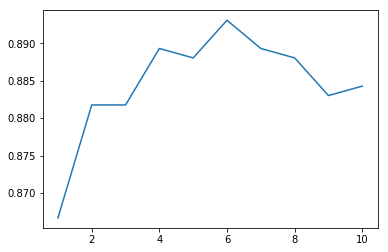

In [211]:
#Cheking the optimal Depth

def get_accuracy_dict():
    accuracy_dict = {}
    for max_depth in range(1,11):
        tree = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
        tree.fit(X_train,y_train)
        yhat = tree.predict(X_test)
        accuracy_dict[max_depth] = accuracy_score(y_test,yhat)
    return accuracy_dict

accuracy_dict = get_accuracy_dict()
lists = sorted(accuracy_dict.items())
x_plot,y_plot = zip(*lists)
plt.plot(x_plot,y_plot)
    




In [219]:
from sklearn.tree import DecisionTreeClassifier 

tree = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [220]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [221]:
yhat = tree.predict(X_test)
yhat[:5]

array(['no', 'no', 'no', 'no', 'no'], dtype=object)

In [222]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,yhat)

0.8930817610062893

In [223]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree as t
%matplotlib inline 

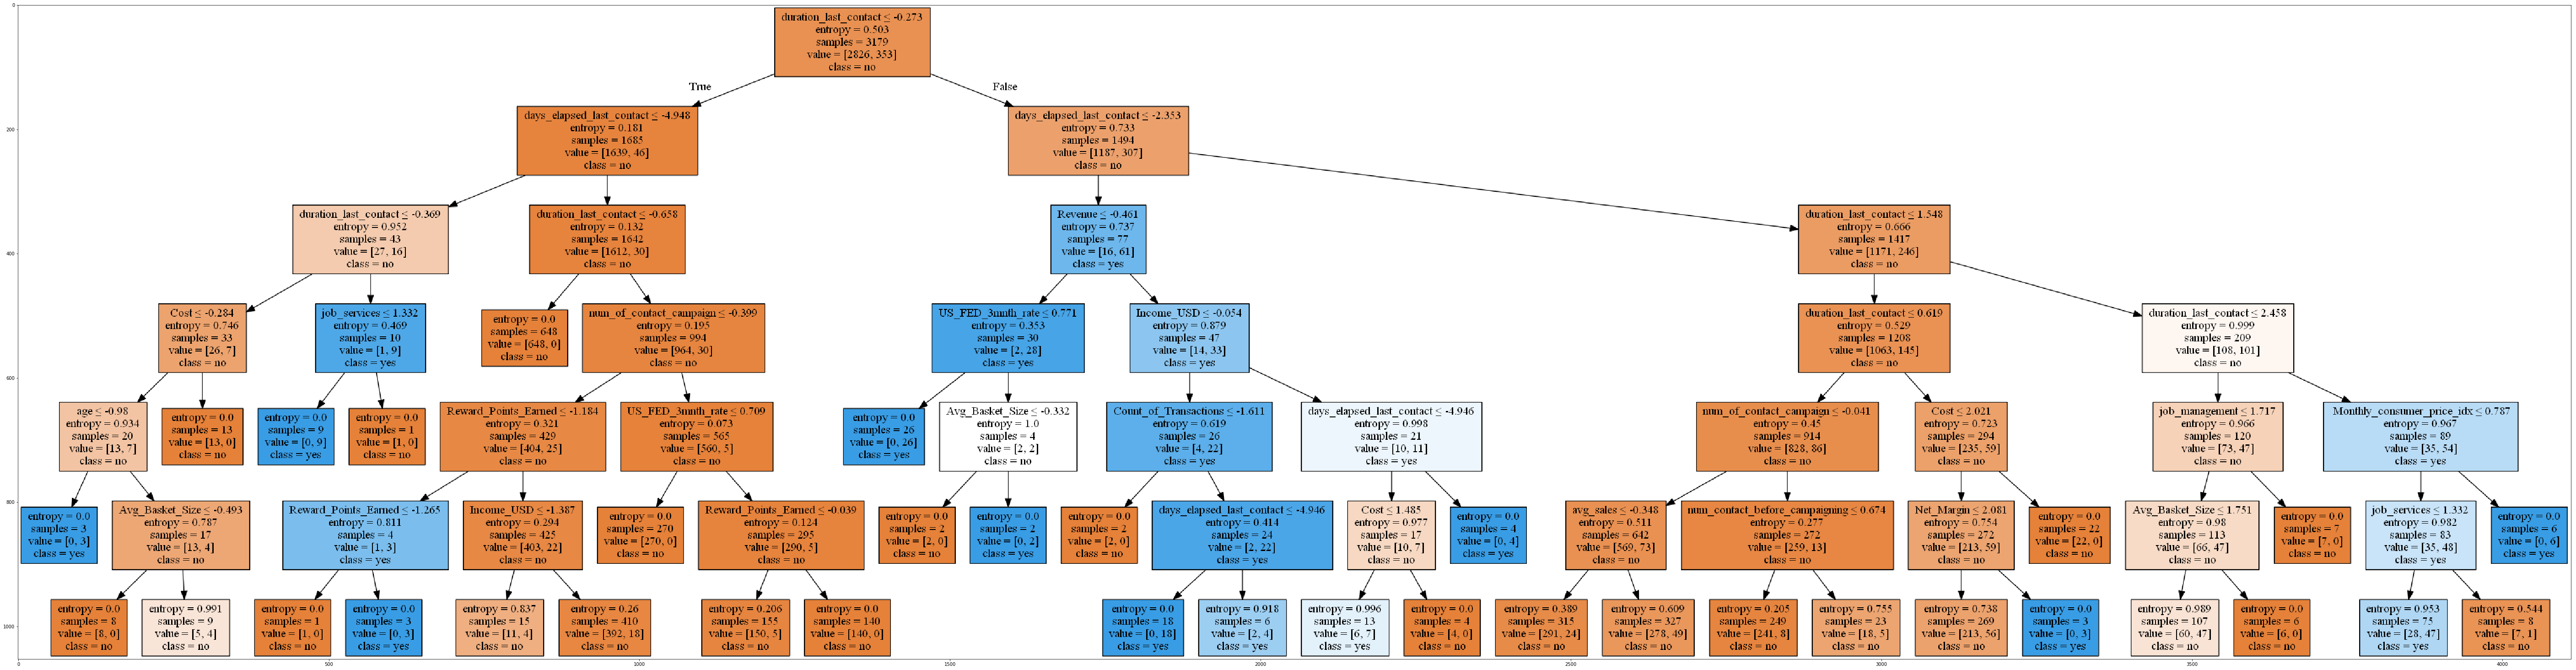

In [224]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = x.columns
targetNames = master["buy_decision_flag"].unique().tolist()
out=t.export_graphviz(tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')